In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "Dataset3/Train"
training_datagen = ImageDataGenerator(  rescale=1./255,
                                        zoom_range=0.15,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

VALIDATION_DIR = "Dataset3/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
                                                        TRAINING_DIR,
                                                        target_size=(224,224),
                                                        shuffle = True,
                                                        class_mode='categorical',
                                                        batch_size = 128)

validation_generator = validation_datagen.flow_from_directory(
                                                        VALIDATION_DIR,
                                                        target_size=(224,224),
                                                        class_mode='categorical',
                                                        shuffle = True,
                                                        batch_size= 14)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

In [3]:
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

Epoch 1/20
14/14 [==============================] - 136s 9s/step - loss: 8.9738 - acc: 0.7231 - val_loss: 0.1919 - val_acc: 0.9235
Epoch 2/20
14/14 [==============================] - 121s 9s/step - loss: 0.5672 - acc: 0.8995 - val_loss: 0.4135 - val_acc: 0.6990
Epoch 3/20
14/14 [==============================] - 121s 9s/step - loss: 0.1124 - acc: 0.9533 - val_loss: 0.1121 - val_acc: 0.9592
Epoch 4/20
14/14 [==============================] - 119s 8s/step - loss: 0.1090 - acc: 0.9551 - val_loss: 0.1221 - val_acc: 0.9643
Epoch 5/20
14/14 [==============================] - 134s 9s/step - loss: 0.3427 - acc: 0.8995 - val_loss: 0.7816 - val_acc: 0.8827
Epoch 6/20
14/14 [==============================] - 138s 10s/step - loss: 0.0993 - acc: 0.9701 - val_loss: 0.4877 - val_acc: 0.8929
Epoch 7/20
14/14 [==============================] - 136s 10s/step - loss: 0.0993 - acc: 0.9605 - val_loss: 0.1832 - val_acc: 0.9643
Epoch 8/20
14/14 [==============================] - 127s 9s/step - loss: 0.3941 -

In [5]:
#To train the top 2 inception blocks, freeze the first 249 layers and unfreeze the rest.

for layer in model.layers[:249]:
  layer.trainable = False
for layer in model.layers[249:]:
  layer.trainable = True

#Recompile the model for these modifications to take effect
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(
            train_generator,
            steps_per_epoch = 14,
            epochs = 10,
            validation_data = validation_generator,
            validation_steps = 14)

C:\Users\keert\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
14/14 [==============================] - 176s 12s/step - loss: 0.4985 - acc: 0.6621 - val_loss: 0.1026 - val_acc: 0.9490
Epoch 2/10
14/14 [==============================] - 167s 12s/step - loss: 0.4294 - acc: 0.7016 - val_loss: 0.1194 - val_acc: 0.9337
Epoch 3/10
14/14 [==============================] - 171s 12s/step - loss: 0.3423 - acc: 0.7620 - val_loss: 0.1296 - val_acc: 0.9388
Epoch 4/10
14/14 [==============================] - 177s 12s/step - loss: 0.3072 - acc: 0.7955 - val_loss: 0.1348 - val_acc: 0.9388
Epoch 5/10
14/14 [==============================] - 176s 12s/step - loss: 0.2859 - acc: 0.8224 - val_loss: 0.1411 - val_acc: 0.9388
Epoch 6/10
14/14 [==============================] - 178s 13s/step - loss: 0.2558 - acc: 0.8535 - val_loss: 0.1497 - val_acc: 0.9337
Epoch 7/10
14/14 [==============================] - 178s 12s/step - loss: 0.2332 - acc: 0.8834 - val_loss: 0.1561 - val_acc: 0.9286
Epoch 8/10
14/14 [==============================] - 185s 13s/step - loss: 0.

In [6]:
model.save('firedetect.h5')

In [8]:
test_loss,test_acc = model.evaluate(validation_generator,verbose=2)
print('\nTest Accuracy:',test_acc)

15/15 - 19s - loss: 0.1687 - acc: 0.9300

Test Accuracy: 0.9300000071525574


In [9]:
test_loss,test_acc = model.evaluate(train_generator,verbose=2)
print('\nTrain Accuracy:',test_acc)

15/15 - 173s - loss: 0.1121 - acc: 0.9750

Train Accuracy: 0.9750000238418579


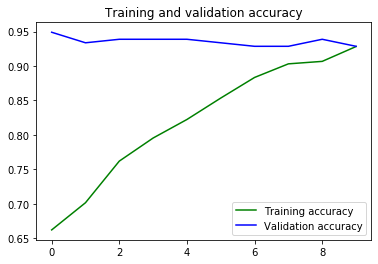

<Figure size 432x288 with 0 Axes>

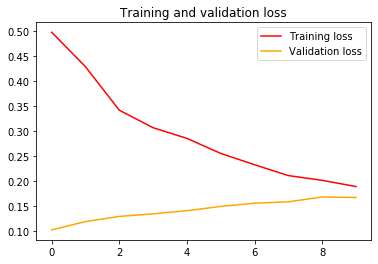

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [14]:
import numpy as np

In [1]:
from keras.models import load_model
model = load_model('firedetect.h5')

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sn
import tensorflow as tf

filenames=validation_generator.filenames
nb_samples = len(validation_generator)
y_prob=[]
y_act=[]
validation_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = validation_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

In [15]:
predicted_class = []
actual_class = []

for j in y_prob:
    for i in j:
        predicted_class.append(emotion_dict[int(np.argmax(i))])

for j in y_act:
    for i in j:
        actual_class.append(emotion_dict[int(np.argmax(i))])

In [12]:
emotion_dict = {0:'Fire', 1:'Neutral'}

In [16]:
print(classification_report(predicted_class, actual_class))

              precision    recall  f1-score   support

        Fire       0.88      0.98      0.93        90
     Neutral       0.98      0.89      0.93       110

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200

